## Loading Pappaya Images Data Set into NumPy Array

The following code block will load the image dataset of the pappaya to numpy array. The data set is structured as unmature, patiallymature and mature images of pappaya.

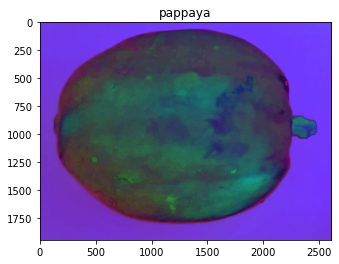

In [6]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random

dir='images/ripness/pappaya'
data=[]
categories = ['unmature','patiallyMature','mature']

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        fruit_img=cv2.imread(imgpath,1)
        hsv = cv2.cvtColor(fruit_img, cv2.COLOR_BGR2HSV)
        plt.imshow(hsv)
        plt.title('pappaya')
        plt.show()
        
        try:
            hsv=cv2.resize(hsv,(50,50))
            image=np.array(hsv).flatten()

            data.append([image,label])
        except Exception as e:
            pass
        break
    break


## Create pappaya_ripness.pickle File 

This code block will create an pickle file of pappaya structured images dataset **(images/ripness/pappaya)**

In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random

dir='images/ripness/pappaya'
data=[]
categories = ['unmature','patiallyMature','mature']

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        fruit_img=cv2.imread(imgpath,1)
        hsv = cv2.cvtColor(fruit_img, cv2.COLOR_BGR2HSV)
        
        try:
            hsv=cv2.resize(hsv,(50,50))
            image=np.array(hsv).flatten()

            data.append([image,label])
        except Exception as e:
            pass

print(len(data))
pick_in=open('pappaya_ripness.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

300


## Devide the Features and Labels of the Numpy Array

To train the SVM pappaya data set features and labels are devided to two list of dataset.

In [10]:
pick_in=open('pappaya_ripness.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
print(features)
print(labels)

[array([114,  63, 250, ..., 112,  55, 225], dtype=uint8), array([112,  44, 235, ..., 116,  42, 204], dtype=uint8), array([112,  59, 227, ..., 115,  57, 222], dtype=uint8), array([113,  62, 235, ..., 115,  49, 229], dtype=uint8), array([116,  63, 171, ..., 114,  53, 230], dtype=uint8), array([115,  56, 228, ..., 115,  53, 184], dtype=uint8), array([120,  50, 121, ..., 112,  40, 234], dtype=uint8), array([114,  51, 239, ..., 116,  49, 192], dtype=uint8), array([120,  50, 121, ..., 112,  40, 234], dtype=uint8), array([113,  56, 227, ..., 114,  45, 182], dtype=uint8), array([112,  59, 227, ..., 115,  57, 222], dtype=uint8), array([119,  46, 115, ..., 113,  41, 246], dtype=uint8), array([115,  53, 228, ..., 117,  51, 180], dtype=uint8), array([113,  56, 227, ..., 114,  45, 182], dtype=uint8), array([119,  47, 119, ..., 114,  38, 243], dtype=uint8), array([113,  59, 236, ..., 113,  62, 184], dtype=uint8), array([115,  56, 228, ..., 115,  53, 184], dtype=uint8), array([114,  43, 246, ..., 145

## Train the SVM to Detect the Ripness of the Pappaya

Following code block will train the sklearn SVM to classify the pappaya according to the ripness of the fruit.

Accuracy:  1.0


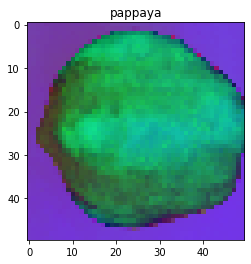

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.25)

model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)
prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)
print('Accuracy: ', accuracy)

myfruit=xtest[45].reshape(50,50,-1)

plt.imshow(myfruit)
plt.title('pappaya')
plt.show()